# The primitive integral $\mathcal{H}_{u,v}$

#### Validation of the solution to the primitive integral

Let's import some stuff and define the numerical version of the integral and the analytical version based on recurrence relations.

In [47]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as pl
%matplotlib inline

def HNumerical(u, v, lam):
    """Compute the integral numerically."""
    sol, err = quad(lambda phi: np.cos(phi) ** u * np.sin(phi) ** v, np.pi - lam, 2 * np.pi + lam)
    return sol

def HAnalytic(u, v, lam):
    """Compute the integral analytically."""
    if (u % 2 != 0):
        return 0
    elif u == 0 and v == 0:
        return 2 * lam + np.pi
    elif u == 0 and v == 1:
        return -2 * np.cos(lam)
    elif u >= 2:
        return 2 / (u + v) * np.cos(lam) ** (u - 1) * np.sin(lam) ** (v + 1) + (u - 1) / (u + v) * HAnalytical(u - 2, v, lam)
    else:
        return -2 / (u + v) * np.cos(lam) ** (u + 1) * np.sin(lam) ** (v - 1) + (v - 1) / (u + v) * HAnalytical(u, v - 2, lam) 

In [54]:
def Plot(u, v):
    """Plot the numerical and analytic solution for comparison."""
    lam = np.linspace(0, np.pi / 2, 100)
    fig, ax = pl.subplots(1, 2, figsize=(15, 3))
    fig.subplots_adjust(wspace=0.25)
    sol1 = np.array([HNumerical(u, v, l) for l in lam])
    sol2 = np.array([HAnalytic(u, v, l) for l in lam])
    ax[0].plot(lam, sol1, lw=4, label='Numerical');
    ax[0].plot(lam, sol2, label='Analytic');
    ax[0].legend();
    ax[1].plot(lam, np.abs(sol1 - sol2))
    ax[1].set_yscale('log')
    ax[0].set_xlabel(r'$\lambda$', fontsize=18);
    ax[1].set_xlabel(r'$\lambda$', fontsize=18);
    ax[0].set_ylabel(r'$H_{%d,%d}$' % (u, v), fontsize=18);
    ax[1].set_ylabel(r'Error', fontsize=18);

We can now show that the solutions agree to floating point precision for the first several values of $u$ and $v$:

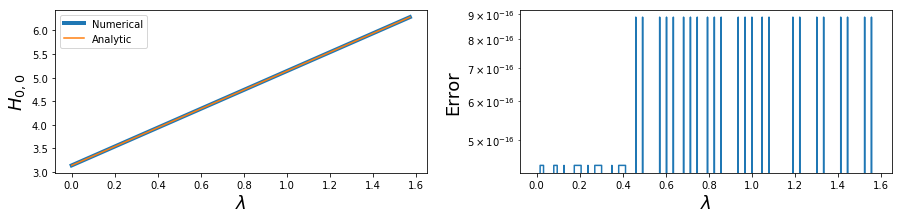

In [56]:
Plot(0,0)

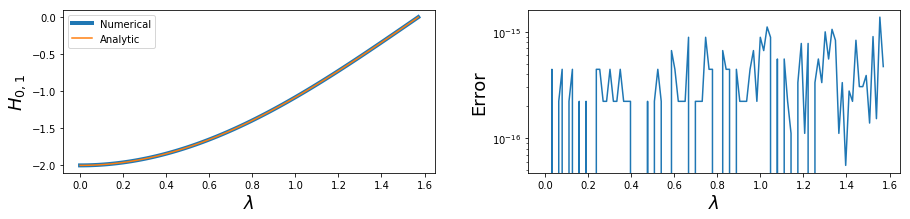

In [60]:
Plot(0,1)

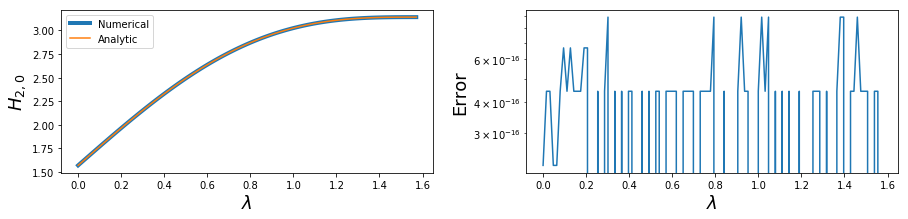

In [61]:
Plot(2,0)

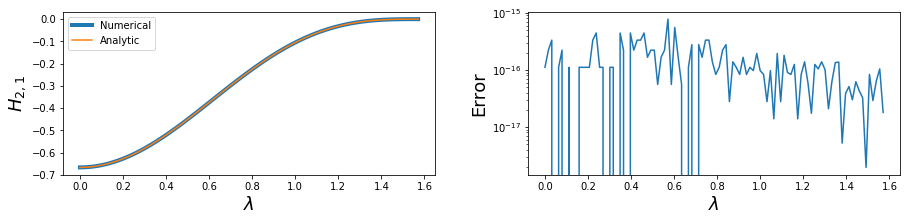

In [62]:
Plot(2,1)

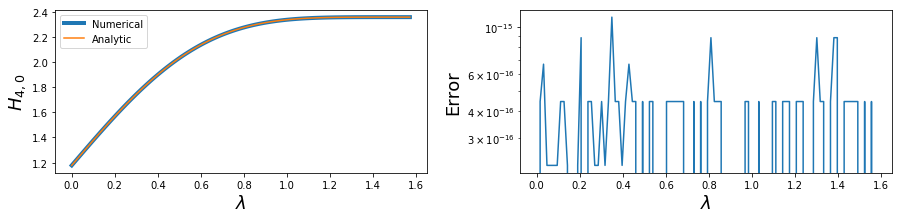

In [63]:
Plot(4,0)

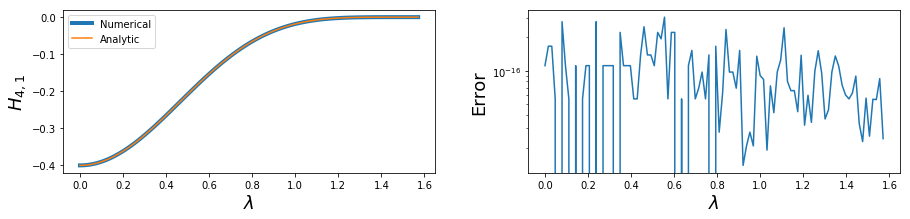

In [64]:
Plot(4,1)

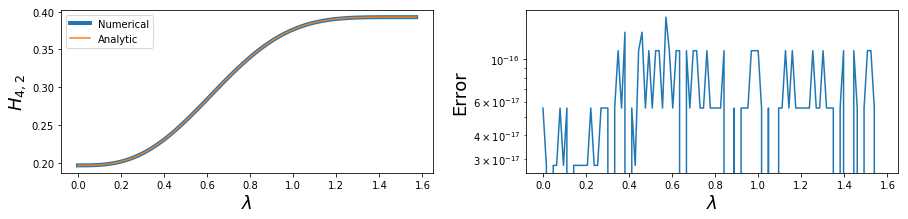

In [65]:
Plot(4,2)

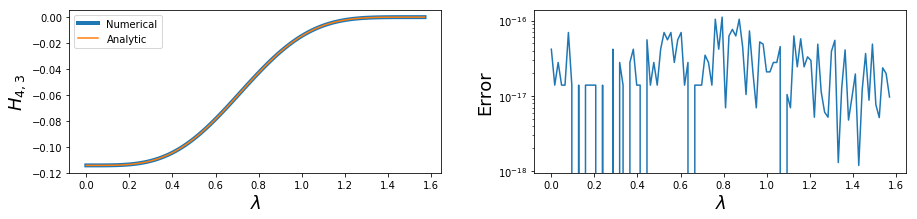

In [66]:
Plot(4,3)

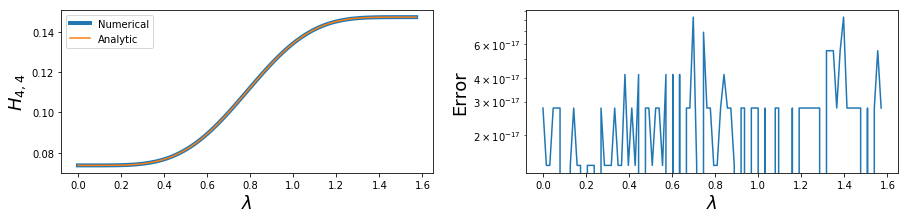

In [67]:
Plot(4,4)

■